# Discontinuous and Oscillating Function
$$y=\begin{cases} 5 + \sum_{k=1}^4 \sin(kx), x<0 \\ \cos(10x), x\geq 0 \end{cases}$$

This is an example function in https://arxiv.org/pdf/2406.02917

## DeepMacroFin

In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from deep_macrofin import PDEModel
from deep_macrofin import ActivationType, Comparator, Constraint, OptimizerType, System, plot_loss_df, set_seeds

set_seeds(0)
discont_approx2 = PDEModel("discontinuous_approximator", {"num_epochs": 50000, "optimizer_type": OptimizerType.Adam})
discont_approx2.set_state(["x"], {"x": [-3., 3.]})
discont_approx2.add_endog("y", {
    "hidden_units": [40, 40],
    "activation_type": ActivationType.SiLU,
})
neg_sys = System([Constraint("x", Comparator.LT, "0", label="neg_const")], label="neg_sys")
neg_sys.add_endog_equation("y=5+sin(x)+sin(2*x)+sin(3*x)+sin(4*x)")
pos_sys = System([Constraint("x", Comparator.GEQ, "0", label="pos_const")], label="pos_sys")
pos_sys.add_endog_equation("y=cos(10*x)")
discont_approx2.add_system(neg_sys)
discont_approx2.add_system(pos_sys)
print(discont_approx2)
if not os.path.exists("./models/discont_approx2/discont_approx2.pt"):
    discont_approx2.train_model("./models/discont_approx2", "discont_approx2.pt", True)
    discont_approx2.load_model(torch.load("./models/discont_approx2/discont_approx2_best.pt"))
    discont_approx2.eval_model(True)
else:
    discont_approx2.load_model(torch.load("./models/discont_approx2/discont_approx2_best.pt"))
    discont_approx2.eval_model(True)

==================Summary of Model discontinuous_approximator===================
Config: {
 "batch_size": 100,
 "num_epochs": 50000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam"
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
x: [-3.0, 3.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: y
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=40, bias=True)
    (activation_0): SiLU()
    (linear_1): Linear(in_features=40, out_features=40, bias=True)
    (activation_1): SiLU()
    (final_layer): Linear(in_features=40, out_features=1, bias=True)
  )
)
Num parameters: 1761
--------------------------------------------------------

Total loss: 0.0354: 100%|██████████| 50000/50000 [02:23<00:00, 348.98it/s]

training finished, total time :: 143.27969121932983
Best model saved to ./models/discont_approx2/discont_approx2_best.pt if valid
Model saved to ./models/discont_approx2/discont_approx2.pt
Model loaded
===================================Evaluating===================================
loss :: system_neg_sys: 0.0023,
system_pos_sys: 0.0006,
total_loss: 0.0030


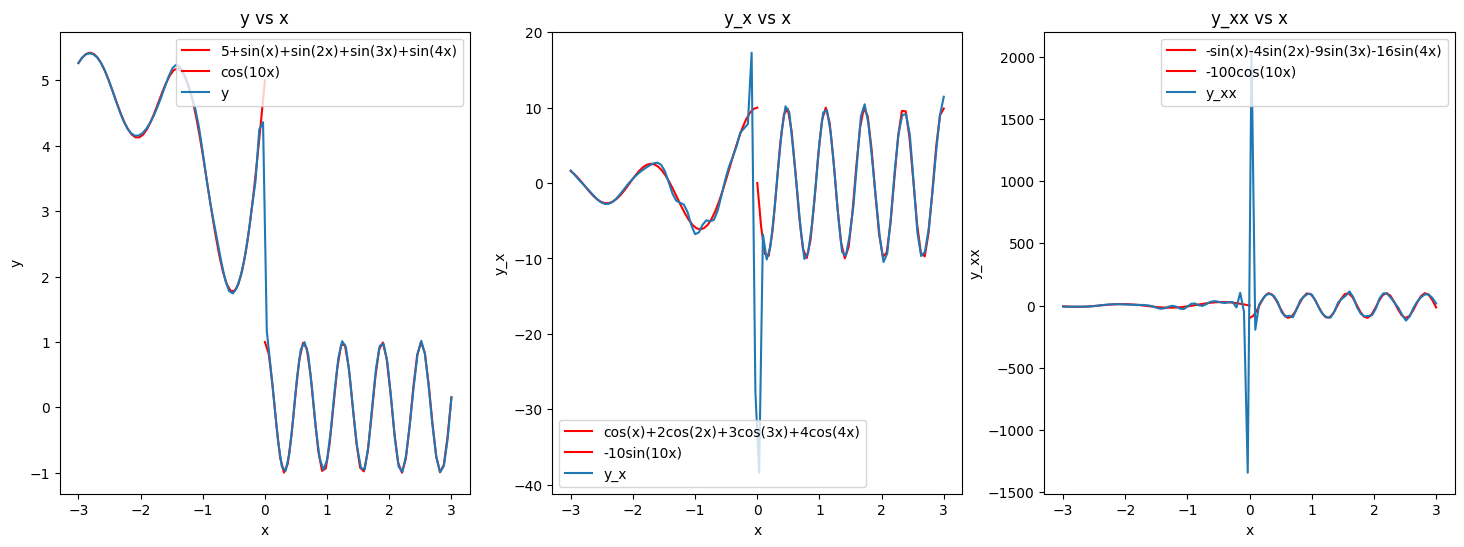

In [2]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
x = np.linspace(-3, 3)
x_neg = np.linspace(-3, 0)
x_pos = np.linspace(0, 3)
ax[0].plot(x_neg, 5+np.sin(x_neg)+np.sin(2*x_neg)+np.sin(3*x_neg)+np.sin(4*x_neg), label="5+sin(x)+sin(2x)+sin(3x)+sin(4x)", color="red")
ax[0].plot(x_pos, np.cos(10*x_pos), label="cos(10x)", color="red")
ax[1].plot(x_neg, np.cos(x_neg)+2*np.cos(2*x_neg)+3*np.cos(3*x_neg)+4*np.cos(4*x_neg), label="cos(x)+2cos(2x)+3cos(3x)+4cos(4x)", color="red")
ax[1].plot(x_pos, -10*np.sin(10*x_pos), label="-10sin(10x)", color="red")
ax[2].plot(x_neg, -np.sin(x_neg)-4*np.sin(2*x_neg)-9*np.sin(3*x_neg)-16*np.sin(4*x_neg), label="-sin(x)-4sin(2x)-9sin(3x)-16sin(4x)", color="red")
ax[2].plot(x_pos, -100*np.cos(10*x_pos), label="-100cos(10x)", color="red")
discont_approx2.endog_vars["y"].plot("y", {"x": [-3, 3]}, ax=ax[0])
discont_approx2.endog_vars["y"].plot("y_x", {"x": [-3, 3]}, ax=ax[1])
discont_approx2.endog_vars["y"].plot("y_xx", {"x": [-3, 3]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

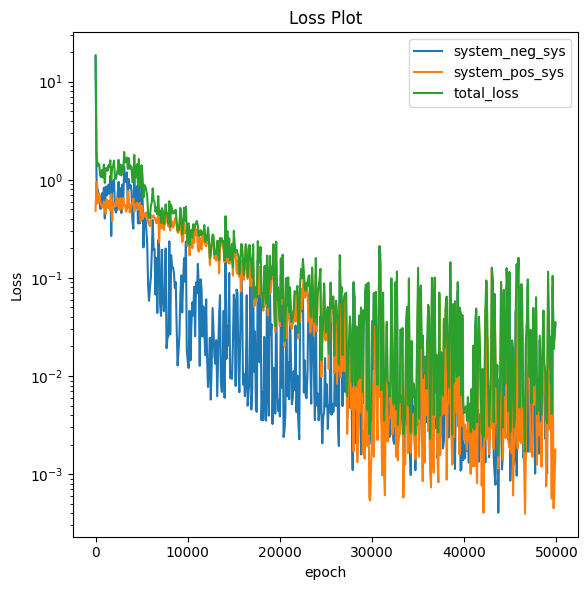

In [3]:
plot_loss_df(fn="./models/discont_approx2/discont_approx2_loss.csv", loss_plot_fn="./models/discont_approx2/discont_approx2_loss.png")

## DeepXDE

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.000497 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [9.27e+00]    [9.31e+00]    [9.78e-01]    
1000      [9.27e+00]    [9.31e+00]    [9.78e-01]    
2000      [9.27e+00]    [9.31e+00]    [9.78e-01]    
3000      [9.27e+00]    [9.31e+00]    [9.78e-01]    
4000      [9.27e+00]    [9.31e+00]    [9.78e-01]    
5000      [9.27e+00]    [9.31e+00]    [9.78e-01]    
6000      [9.27e+00]    [9.31e+00]    [9.78e-01]    
7000      [9.27e+00]    [9.31e+00]    [9.78e-01]    
8000      [9.27e+00]    [9.31e+00]    [9.78e-01]    
9000      [9.27e+00]    [9.31e+00]    [9.78e-01]    
10000     [9.27e+00]    [9.31e+00]    [9.78e-01]    
11000     [9.27e+00]    [9.31e+00]    [9.78e-01]    
12000     [9.27e+00]    [9.31e+00]    [9.78e-01]    
13000     [9.27e+00]    [9.31e+00]    [9.78e-01]    
14000     [9.27e+00]    [9.31e+00]    [9.78e-01]    
15000     [9.27e+00]    [9.31e+00]    [9.78e-01]    
16000     [9.27e+00]    [9.31e+00]

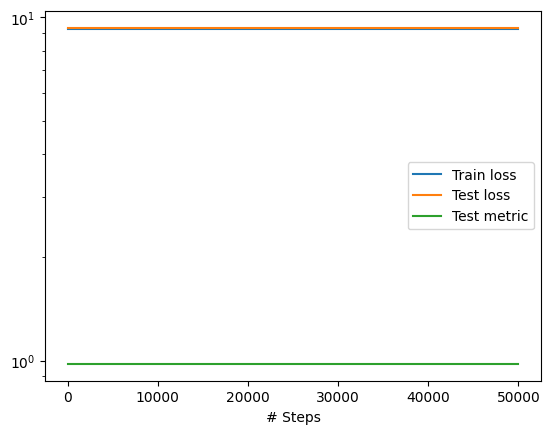

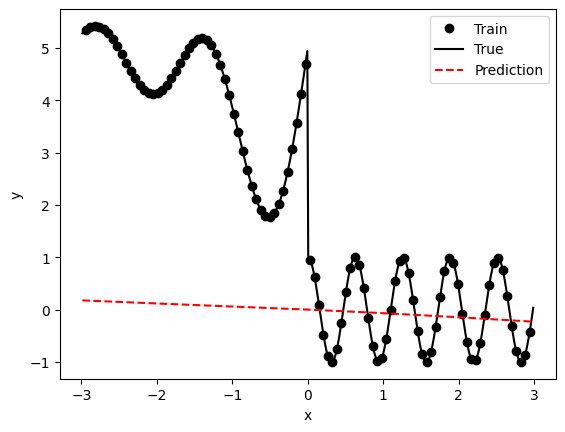

In [4]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import numpy as np
import torch

def ode(x, y):
    try:
        return torch.where(x < 0,
                       5+torch.sin(x)+torch.sin(2*x)+torch.sin(3*x)+torch.sin(4*x),
                       torch.cos(10*x))
    except:
        return np.where(x < 0,
                       5+np.sin(x)+np.sin(2*x)+np.sin(3*x)+np.sin(4*x),
                       np.cos(10*x))


def func(x):
    try:
        return torch.where(x < 0,
                       5+torch.sin(x)+torch.sin(2*x)+torch.sin(3*x)+torch.sin(4*x),
                       torch.cos(10*x))
    except:
        return np.where(x < 0,
                       5+np.sin(x)+np.sin(2*x)+np.sin(3*x)+np.sin(4*x),
                       np.cos(10*x))


geom = dde.geometry.TimeDomain(-3, 3)
data = dde.data.TimePDE(geom, ode, [], 100, 0, solution=func, num_test=500, train_distribution="uniform")
layer_size = [1] + [40] * 2 + [1]
activation = "SiLU"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile(
    "adam", lr=0.001, metrics=["l2 relative error"]
)
losshistory, train_state = model.train(iterations=50000)

dde.saveplot(losshistory, train_state, issave=False, isplot=True)

## PyMacroFin

In [5]:
from PyMacroFin.model import macro_model
import numpy as np
import pandas as pd
import time
import PyMacroFin.utilities as util
from PyMacroFin.system import system

def define_model(npoints):
    m = macro_model(name='BruSan14_log_utility')

    m.set_endog(['y'])
    m.prices = ['y']
    m.set_state(['x'])

    m.constraint('x','<', 0,label='neg_x')
    m.constraint('x','>=', 0,label='pos_x')

    s = system(['neg_x'],m)
    s.endog_equation("y=5+sin(x)+sin(2*x)+sin(3*x)+sin(4*x)")
    s2 = system(['pos_x'], m)
    s2.endog_equation("y=cos(10*x)")

    m.systems.append(s)
    m.systems.append(s2)

    m.options.ignore_HJB_loop = True # it seems that the HJB iteration is not used
    m.options.import_guess = False
    m.options.guess_function = False
    m.options.inner_plot = False
    m.options.outer_plot = False
    m.options.final_plot = True
    m.options.n0 = npoints
    m.options.start0 = -3.0
    m.options.end0 = 3.0
    m.options.inner_solver = 'least_squares'
    m.options.derivative_plotting = [('y','x')]
    m.options.min_iter_outer_static = 5
    m.options.min_iter_inner_static = 0
    m.options.max_iter_outer_static = 100
    m.options.return_solution = True
    m.options.save_solution = False
    m.options.price_derivative_method = 'backward'
    return m

npoints = 100
tic = time.time()
m = define_model(npoints)
df = m.run()
toc = time.time()
print('elapsed time: {}'.format(toc-tic))

AssertionError: endog_var must be an endogenous variable of the model